<a href="https://colab.research.google.com/github/rajaramesh-ds/datascience/blob/master/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning**

# Richer syntax highlighting

Improved support for nested languages:

```notebook-python
df = pd.io.gbq.read_gbq('''
  SELECT 
    REGEXP_EXTRACT(name, '[a-zA-Z]+'),
    SUM(number) as count
  FROM `bigquery-public-data.usa_names.usa_1910_2013`
  WHERE state = 'TX'
  GROUP BY name
  ORDER BY count DESC
  LIMIT 100
''')
```

# Keras

In [1]:
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

# Set random seed
np.random.seed(0)

Using TensorFlow backend.


In [2]:
# Set the number of features we want
number_of_features = 1000

# Load data and target vector from movie review data
(train_data, train_target), (test_data, test_target) = imdb.load_data(num_words=number_of_features)

# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
train_features = tokenizer.sequences_to_matrix(train_data, mode='binary')
test_features = tokenizer.sequences_to_matrix(test_data, mode='binary')

17465344/17464789 [==============================] - 1s 0us/step


In [3]:
# Start neural network
network = models.Sequential()

# Add a dropout layer for input layer
network.add(layers.Dropout(0.2, input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu'))

# Add a dropout layer for previous hidden layer
network.add(layers.Dropout(0.5))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu'))

# Add a dropout layer for previous hidden layer
network.add(layers.Dropout(0.5))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation='sigmoid'))




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [4]:
# Compile neural network
network.compile(loss='binary_crossentropy', # Cross-entropy
                optimizer='rmsprop', # Root Mean Square Propagation
                metrics=['accuracy']) # Accuracy performance metric



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
# Train neural network
history = network.fit(train_features, # Features
                      train_target, # Target vector
                      epochs=3, # Number of epochs
                      verbose=0, # No output
                      batch_size=100, # Number of observations per batch
                      validation_data=(test_features, test_target)) # Data for evaluation

In [0]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K 

# Set that the color channel value will be first
K.set_image_data_format('channels_first')

# Set seed
np.random.seed(0)

In [7]:
# Set image information
channels = 1
height = 28
width = 28

# Load data and target from MNIST data
(train_data, train_target), (test_data, test_target) = mnist.load_data()

# Reshape training image data into features
train_data = train_data.reshape(train_data.shape[0], channels, height, width)

# Reshape test image data into features
test_data = test_data.reshape(test_data.shape[0], channels, height, width)

# Rescale pixel intensity to between 0 and 1
train_features = train_data / 255
test_features = test_data / 255

# One-hot encode target
train_target = np_utils.to_categorical(train_target)
test_target = np_utils.to_categorical(test_target)
number_of_classes = test_target.shape[1]

11493376/11490434 [==============================] - 1s 0us/step


In [8]:
# Start neural network
network = Sequential()

# Add convolutional layer with 64 filters, a 5x5 window, and ReLU activation function
network.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(channels, width, height), activation='relu'))

# Add max pooling layer with a 2x2 window
network.add(MaxPooling2D(pool_size=(2, 2)))

# Add dropout layer
network.add(Dropout(0.5))

# Add layer to flatten input
network.add(Flatten())

# # Add fully connected layer of 128 units with a ReLU activation function
network.add(Dense(128, activation='relu'))

# Add dropout layer
network.add(Dropout(0.5))

# Add fully connected layer with a softmax activation function
network.add(Dense(number_of_classes, activation='softmax'))

In [0]:
# Compile neural network
network.compile(loss='categorical_crossentropy', # Cross-entropy
                optimizer='rmsprop', # Root Mean Square Propagation
                metrics=['accuracy']) # Accuracy performance metric

In [10]:
# Train neural network
network.fit(train_features, # Features
            train_target, # Target
            epochs=2, # Number of epochs
            verbose=0, # Don't print description after each epoch
            batch_size=1000, # Number of observations per batch
            validation_data=(test_features, test_target)) # Data for evaluation

In [0]:
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

# Set random seed
np.random.seed(0)

In [0]:
# Set the number of features we want
number_of_features = 1000

# Load data and target vector from movie review data
(train_data, train_target), (test_data, test_target) = imdb.load_data(num_words=number_of_features)

# Convert movie review data to one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
train_features = tokenizer.sequences_to_matrix(train_data, mode='binary')
test_features = tokenizer.sequences_to_matrix(test_data, mode='binary')

In [0]:
# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu', input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu'))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation='sigmoid'))

In [0]:
# Compile neural network
network.compile(loss='binary_crossentropy', # Cross-entropy
                optimizer='rmsprop', # Root Mean Square Propagation
                metrics=['accuracy']) # Accuracy performance metric

In [15]:
# Train neural network
network.fit(train_features, # Features
            train_target, # Target
            epochs=2, # Number of epochs
            verbose=0, # Don't print description after each epoch
            batch_size=1000, # Number of observations per batch
            validation_data=(test_features, test_target)) # Data for evaluation

In [0]:
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

# Set random seed
np.random.seed(0)

In [0]:
# Set the number of features we want
number_of_features = 1000

# Load data and target vector from movie review data
(train_data, train_target), (test_data, test_target) = imdb.load_data(num_words=number_of_features)

# Convert movie review data to one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
train_features = tokenizer.sequences_to_matrix(train_data, mode='binary')
test_features = tokenizer.sequences_to_matrix(test_data, mode='binary')

In [0]:
# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu', input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu'))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation='sigmoid'))

In [0]:
# Compile neural network
network.compile(loss='binary_crossentropy', # Cross-entropy
                optimizer='rmsprop', # Root Mean Square Propagation
                metrics=['accuracy']) # Accuracy performance metric

In [20]:
# Train neural network
history = network.fit(train_features, # Features
                      train_target, # Target vector
                      epochs=3, # Number of epochs
                      verbose=1, # Print description after each epoch
                      batch_size=100, # Number of observations per batch
                      validation_data=(test_features, test_target)) # Data for evaluation

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 2s 62us/step - loss: 0.4198 - acc: 0.8116 - val_loss: 0.3406 - val_acc: 0.8526
Epoch 2/3
25000/25000 [==============================] - 1s 43us/step - loss: 0.3232 - acc: 0.8640 - val_loss: 0.3270 - val_acc: 0.8606
Epoch 3/3
25000/25000 [==============================] - 1s 45us/step - loss: 0.3122 - acc: 0.8680 - val_loss: 0.3385 - val_acc: 0.8546


In [0]:
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

# Set random seed
np.random.seed(0)

In [0]:
# Set the number of features we want
number_of_features = 1000

# Load data and target vector from movie review data
(train_data, train_target), (test_data, test_target) = imdb.load_data(num_words=number_of_features)

# Convert movie review data to one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
train_features = tokenizer.sequences_to_matrix(train_data, mode='binary')
test_features = tokenizer.sequences_to_matrix(test_data, mode='binary')

In [0]:
# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu', input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu'))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation='sigmoid'))

In [0]:
# Compile neural network
network.compile(loss='binary_crossentropy', # Cross-entropy
                optimizer='rmsprop', # Root Mean Square Propagation
                metrics=['accuracy']) # Accuracy performance metric

In [25]:
# Train neural network
history = network.fit(train_features, # Features
                      train_target, # Target vector
                      epochs=3, # Number of epochs
                      verbose=1, # Print description after each epoch
                      batch_size=100, # Number of observations per batch
                      validation_data=(test_features, test_target)) # Data for evaluation

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 2s 63us/step - loss: 0.4198 - acc: 0.8117 - val_loss: 0.3396 - val_acc: 0.8536
Epoch 2/3
25000/25000 [==============================] - 1s 43us/step - loss: 0.3231 - acc: 0.8641 - val_loss: 0.3280 - val_acc: 0.8603
Epoch 3/3
25000/25000 [==============================] - 1s 43us/step - loss: 0.3120 - acc: 0.8677 - val_loss: 0.3381 - val_acc: 0.8543


In [0]:
# Load libraries
import numpy as np
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

# Set random seed
np.random.seed(0)

In [27]:
# Set the number of features we want
number_of_features = 5000

# Load feature and target data
(train_data, train_target_vector), (test_data, test_target_vector) = reuters.load_data(num_words=number_of_features)

# Convert feature data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
train_features = tokenizer.sequences_to_matrix(train_data, mode='binary')
test_features = tokenizer.sequences_to_matrix(test_data, mode='binary')

# One-hot encode target vector to create a target matrix
train_target = to_categorical(train_target_vector)
test_target = to_categorical(test_target_vector)

2113536/2110848 [==============================] - 0s 0us/step


In [0]:
# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=100, activation='relu', input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=100, activation='relu'))

# Add fully connected layer with a softmax activation function
network.add(layers.Dense(units=46, activation='softmax'))

In [0]:
# Compile neural network
network.compile(loss='categorical_crossentropy', # Cross-entropy
                optimizer='rmsprop', # Root Mean Square Propagation
                metrics=['accuracy']) # Accuracy performance metric

In [0]:
# Train neural network
history = network.fit(train_features, # Features
                      train_target, # Target vector
                      epochs=3, # Three epochs
                      verbose=0, # No output
                      batch_size=100, # Number of observations per batch
                      validation_data=(test_features, test_target)) # Data to use for evaluation

In [0]:
# Load libraries
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Set random seed
np.random.seed(0)

In [0]:
# Generate features matrix and target vector
features, target = make_regression(n_samples = 10000,
                                   n_features = 3,
                                   n_informative = 3,
                                   n_targets = 1,
                                   noise = 0.0,
                                   random_state = 0)

# Divide our data into training and test sets
train_features, test_features, train_target, test_target = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.33, 
                                                                            random_state=0)

In [0]:
# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32, activation='relu', input_shape=(train_features.shape[1],)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32, activation='relu'))

# Add fully connected layer with no activation function
network.add(layers.Dense(units=1))

In [0]:
# Compile neural network
network.compile(loss='mse', # Mean squared error
                optimizer='RMSprop', # Optimization algorithm
                metrics=['mse']) # Mean squared error

In [0]:
# Train neural network
history = network.fit(train_features, # Features
                      train_target, # Target vector
                      epochs=10, # Number of epochs
                      verbose=0, # No output
                      batch_size=100, # Number of observations per batch
                      validation_data=(test_features, test_target)) # Data for evaluation

In [0]:
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import models
from keras import layers

# Set random seed
np.random.seed(0)

In [0]:
# Set the number of features we want
number_of_features = 1000

# Load data and target vector from movie review data
(train_data, train_target), (test_data, test_target) = imdb.load_data(num_words=number_of_features)

# Use padding or truncation to make each observation have 400 features
train_features = sequence.pad_sequences(train_data, maxlen=400)
test_features = sequence.pad_sequences(test_data, maxlen=400)

In [38]:
# View first observation
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [39]:
# View first observation
test_features[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [0]:
# Start neural network
network = models.Sequential()

# Add an embedding layer
network.add(layers.Embedding(input_dim=number_of_features, output_dim=128))

# Add a long short-term memory layer with 128 units
network.add(layers.LSTM(units=128))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation='sigmoid'))

In [0]:
# Compile neural network
network.compile(loss='binary_crossentropy', # Cross-entropy
                optimizer='Adam', # Adam optimization
                metrics=['accuracy']) # Accuracy performance metric

In [0]:
# Train neural network
history = network.fit(train_features, # Features
                      train_target, # Target
                      epochs=3, # Number of epochs
                      verbose=0, # Do not print description after each epoch
                      batch_size=1000, # Number of observations per batch
                      validation_data=(test_features, test_target)) # Data for evaluation

In [0]:
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Set random seed
np.random.seed(0)

In [0]:
# Set the number of features we want
number_of_features = 1000

# Load data and target vector from movie review data
(train_data, train_target), (test_data, test_target) = imdb.load_data(num_words=number_of_features)

# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
train_features = tokenizer.sequences_to_matrix(train_data, mode='binary')
test_features = tokenizer.sequences_to_matrix(test_data, mode='binary')

In [0]:
# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu', input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu'))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation='sigmoid'))

In [0]:
# Compile neural network
network.compile(loss='binary_crossentropy', # Cross-entropy
                optimizer='rmsprop', # Root Mean Square Propagation
                metrics=['accuracy']) # Accuracy performance metric

In [0]:
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

In [0]:
# Train neural network
history = network.fit(train_features, # Features
                      train_target, # Target vector
                      epochs=20, # Number of epochs
                      callbacks=callbacks, # Early stopping
                      verbose=0, # Print description after each epoch
                      batch_size=100, # Number of observations per batch
                      validation_data=(test_features, test_target)) # Data for evaluation

In [0]:
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras import regularizers

# Set random seed
np.random.seed(0)

In [0]:
# Set the number of features we want
number_of_features = 1000

# Load data and target vector from movie review data
(train_data, train_target), (test_data, test_target) = imdb.load_data(num_words=number_of_features)

# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
train_features = tokenizer.sequences_to_matrix(train_data, mode='binary')
test_features = tokenizer.sequences_to_matrix(test_data, mode='binary')

In [0]:
# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function and L2 regularization
network.add(layers.Dense(units=16, 
                         activation='relu', 
                         kernel_regularizer=regularizers.l2(0.01),
                         input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function and L2 regularization
network.add(layers.Dense(units=16, 
                         kernel_regularizer=regularizers.l2(0.01),
                         activation='relu'))

In [0]:
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation='sigmoid'))# Compile neural network
network.compile(loss='binary_crossentropy', # Cross-entropy
                optimizer='rmsprop', # Root Mean Square Propagation
                metrics=['accuracy']) # Accuracy performance metric

In [0]:
# Train neural network
history = network.fit(train_features, # Features
                      train_target, # Target vector
                      epochs=3, # Number of epochs
                      verbose=0, # No output
                      batch_size=100, # Number of observations per batch
                      validation_data=(test_features, test_target)) # Data for evaluation

In [0]:
# Load libraries
from sklearn import preprocessing
import numpy as np

In [0]:
# Create feature
features = np.array([[-100.1, 3240.1], 
                     [-200.2, -234.1], 
                     [5000.5, 150.1], 
                     [6000.6, -125.1], 
                     [9000.9, -673.1]])

In [0]:
# Create scaler
scaler = preprocessing.StandardScaler()

# Transform the feature
features_standardized = scaler.fit_transform(features)

In [57]:
# Show feature
features_standardized

array([[-1.12541308,  1.96429418],
       [-1.15329466, -0.50068741],
       [ 0.29529406, -0.22809346],
       [ 0.57385917, -0.42335076],
       [ 1.40955451, -0.81216255]])

In [58]:
# Print mean and standard deviation
print('Mean:', round(features_standardized[:,0].mean()))
print('Standard deviation:', features_standardized[:,0].std())

Mean: 0.0
Standard deviation: 0.9999999999999999


In [0]:
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.callbacks import ModelCheckpoint

# Set random seed
np.random.seed(0)

In [0]:
# Set the number of features we want
number_of_features = 1000

# Load data and target vector from movie review data
(train_data, train_target), (test_data, test_target) = imdb.load_data(num_words=number_of_features)

# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
train_features = tokenizer.sequences_to_matrix(train_data, mode='binary')
test_features = tokenizer.sequences_to_matrix(test_data, mode='binary')

In [0]:
# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu', input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu'))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation='sigmoid'))

In [0]:
# Compile neural network
network.compile(loss='binary_crossentropy', # Cross-entropy
                optimizer='rmsprop', # Root Mean Square Propagation
                metrics=['accuracy']) # Accuracy performance metric

In [0]:
# Set callback functions to early stop training and save the best model so far
checkpoint = [ModelCheckpoint(filepath='models.hdf5')]

In [0]:
# Train neural network
history = network.fit(train_features, # Features
                      train_target, # Target vector
                      epochs=3, # Number of epochs
                      callbacks=checkpoint, # Checkpoint
                      verbose=0, # No output
                      batch_size=100, # Number of observations per batch
                      validation_data=(test_features, test_target)) # Data for evaluation

In [0]:
# Load libraries
import numpy as np
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

# Set random seed
np.random.seed(0)

In [0]:
# Number of features
number_of_features = 100

# Generate features matrix and target vector
features, target = make_classification(n_samples = 10000,
                                       n_features = number_of_features,
                                       n_informative = 3,
                                       n_redundant = 0,
                                       n_classes = 2,
                                       weights = [.5, .5],
                                       random_state = 0)

In [0]:
# Create function returning a compiled network
def create_network(optimizer='rmsprop'):
    
    # Start neural network
    network = models.Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu', input_shape=(number_of_features,)))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu'))

    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation='sigmoid'))

    # Compile neural network
    network.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer=optimizer, # Optimizer
                    metrics=['accuracy']) # Accuracy performance metric
    
    # Return compiled network
    return network

In [0]:
# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=create_network, verbose=0)

In [0]:
# Create hyperparameter space
epochs = [5, 10]
batches = [5, 10, 100]
optimizers = ['rmsprop', 'adam']

# Create hyperparameter options
hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)

In [0]:
# Create grid search
grid = GridSearchCV(estimator=neural_network, cv=3, param_grid=hyperparameters)

# Fit grid search
grid_result = grid.fit(features, target)

In [71]:
# View hyperparameters of best neural network
grid_result.best_params_

{'batch_size': 10, 'epochs': 5, 'optimizer': 'adam'}

In [0]:
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(0)

In [0]:
# Set the number of features we want
number_of_features = 10000

# Load data and target vector from movie review data
(train_data, train_target), (test_data, test_target) = imdb.load_data(num_words=number_of_features)

# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
train_features = tokenizer.sequences_to_matrix(train_data, mode='binary')
test_features = tokenizer.sequences_to_matrix(test_data, mode='binary')

In [0]:
# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu', input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu'))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation='sigmoid'))

In [0]:
# Compile neural network
network.compile(loss='binary_crossentropy', # Cross-entropy
                optimizer='rmsprop', # Root Mean Square Propagation
                metrics=['accuracy']) # Accuracy performance metric

In [0]:
# Train neural network
history = network.fit(train_features, # Features
                      train_target, # Target
                      epochs=15, # Number of epochs
                      verbose=0, # No output
                      batch_size=1000, # Number of observations per batch
                      validation_data=(test_features, test_target)) # Data for evaluation

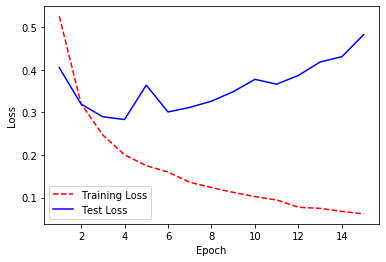

In [77]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();


In [0]:
# Load libraries
from keras import models
from keras import layers
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

In [0]:
# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu', input_shape=(10,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu'))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation='sigmoid'))

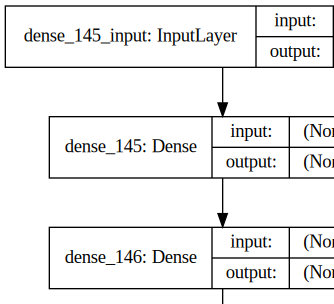

In [80]:
# Visualize network architecture
SVG(model_to_dot(network, show_shapes=True).create(prog='dot', format='svg'))

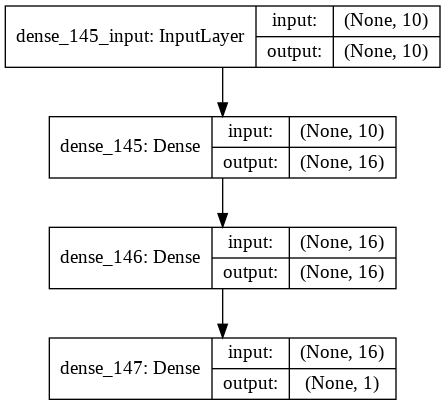

In [81]:
# Save the visualization as a file
plot_model(network, show_shapes=True, to_file='network.png')

In [0]:
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(0)

In [0]:
# Set the number of features we want
number_of_features = 10000

# Load data and target vector from movie review data
(train_data, train_target), (test_data, test_target) = imdb.load_data(num_words=number_of_features)

# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
train_features = tokenizer.sequences_to_matrix(train_data, mode='binary')
test_features = tokenizer.sequences_to_matrix(test_data, mode='binary')

In [0]:
# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu', input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu'))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation='sigmoid'))

In [0]:
# Compile neural network
network.compile(loss='binary_crossentropy', # Cross-entropy
                optimizer='rmsprop', # Root Mean Square Propagation
                metrics=['accuracy']) # Accuracy performance metric

In [0]:
# Train neural network
history = network.fit(train_features, # Features
                      train_target, # Target
                      epochs=15, # Number of epochs
                      verbose=0, # No output
                      batch_size=1000, # Number of observations per batch
                      validation_data=(test_features, test_target)) # Data for evaluation

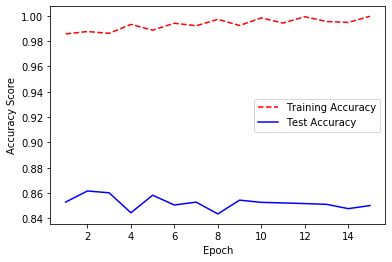

In [88]:
# Get training and test accuracy histories
training_accuracy = history.history['acc']
test_accuracy = history.history['val_acc']

# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)

# Visualize accuracy history
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.show();

In [0]:
# Load libraries
import numpy as np
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

# Set random seed
np.random.seed(0)

In [0]:
# Number of features
number_of_features = 100

# Generate features matrix and target vector
features, target = make_classification(n_samples = 10000,
                                       n_features = number_of_features,
                                       n_informative = 3,
                                       n_redundant = 0,
                                       n_classes = 2,
                                       weights = [.5, .5],
                                       random_state = 0)

In [0]:
# Create function returning a compiled network
def create_network():
    
    # Start neural network
    network = models.Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu', input_shape=(number_of_features,)))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu'))

    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation='sigmoid'))

    # Compile neural network
    network.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy']) # Accuracy performance metric
    
    # Return compiled network
    return network

In [0]:
# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=10, 
                                 batch_size=100, 
                                 verbose=0)

In [93]:
# Evaluate neural network using three-fold cross-validation
cross_val_score(neural_network, features, target, cv=3)

array([0.90431914, 0.77527752, 0.86948695])